<a href="https://colab.research.google.com/github/lewisjustin749/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This jupyter notebook is prepared by “Justin Lewis”

1. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [ ]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

Saving hrdata.csv to hrdata.csv


2. import the data to a dataframe and show how many rows and columns does it have (1 pt)

In [ ]:
#=======================================================================================
# Importing the data:
#=======================================================================================

def read_data():
  df_data = pd.read_csv('hrdata.csv')
  print("Data Frame data imported successfully!!")
  return df_data
df_data = read_data()

Data Frame data imported successfully!!


In [ ]:
print(" data shape =", df_data.shape)

 data shape = (21287, 18)


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21287 non-null  int64  
 1   rec_num                   21287 non-null  int64  
 2   enrollee_id               21287 non-null  int64  
 3   city                      21287 non-null  object 
 4   city_development_index    21287 non-null  float64
 5   gender                    16271 non-null  object 
 6   relevent_experience       21287 non-null  object 
 7   enrolled_university       20870 non-null  object 
 8   education_level           20775 non-null  object 
 9   major_discipline          18162 non-null  object 
 10  experience                21217 non-null  object 
 11  company_size              14727 non-null  object 
 12  company_type              14513 non-null  object 
 13  last_new_job              20824 non-null  object 
 14  traini

3. call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)

In [ ]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================
df_data.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


Explain in words if you find any column’s statistics interesting and good to know (1 pt)

* More than 75% of employees live in a developed city with an metric > 9 
* About 24.9% of people are looking to switch jobs after training.
* Training Hours feature has right skewness, So if we are going to fill missing values.
* outliers in training hours.



In [ ]:
#=======================================================================================
# Discovering the categorical data distribution :
#=======================================================================================

df_data.describe(include = ["O"])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,state
count,21287,16271,21287,20870,20775,18162,21217,14727,14513,20824,21287
unique,123,3,2,3,5,6,22,8,6,6,1
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,CA
freq,4828,14681,15316,15336,12867,16113,3669,3421,10958,8924,21287


Insights:
* 73.4% of the canidates were not enrolled in university before going through training
* More than half of the Candidates graduted College (61.9%)
* 90.2% of the candidates are males
* About 28% of Candidates listed not having revelant experience in data/data Science prior to training for the company
* 88.7% of candidates have studied a STEM major in school 
* About 75% candidates worked in a Pvt Ltd 

4. Show the top 5 rows and last 5 rows of the data frame (1 pt)

In [ ]:
df_data.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [ ]:
df_data.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [ ]:
### Removing Unnamed 0: column since it is used for indexing and is not part of the Data
df_data.drop('Unnamed: 0', inplace=True, axis=1)

5. List all the numerical columns (1 pt)

In [ ]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
numerical_columns = df_data.select_dtypes(include = [np.number])
print(numerical_columns.columns.values)

['rec_num' 'enrollee_id' 'city_development_index' 'training_hours'
 'target' 'city_development_matrics']


6. List all the categorial columns (1 pt)

In [ ]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
categorical_columns = df_data.select_dtypes(include = [np.object])
print(categorical_columns.columns.values)

['city' 'gender' 'relevent_experience' 'enrolled_university'
 'education_level' 'major_discipline' 'experience' 'company_size'
 'company_type' 'last_new_job' 'state']


7. Examine missing values: (2 + 2 + 2 + 5 = 11 pt)



>I. Show a list with column wise count of missing values and display the list in count wise descending order





In [ ]:
 missingvalues = df_data.isnull().sum() 
 missingvalues.sort_values(inplace = True, ascending = False)
 print(missingvalues)


company_type                6774
company_size                6560
gender                      5016
major_discipline            3125
target                      2129
education_level              512
last_new_job                 463
enrolled_university          417
experience                    70
state                          0
training_hours                 0
rec_num                        0
enrollee_id                    0
relevent_experience            0
city_development_index         0
city                           0
city_development_matrics       0
dtype: int64


Missing data in multiple categorical features. Gender, Company type and size features almost has 50 % missing values. About 10% of target data is missing. Process in data process step




> II. Show a list with column wise percentage of missing values and display the list in percentage wise descending order





In [ ]:
missingvalues_percent = df_data.isnull().sum()/len(df_data)*100
missingvalues_percent.sort_values(inplace = True, ascending = False)
print(missingvalues_percent)

company_type                31.822239
company_size                30.816931
gender                      23.563677
major_discipline            14.680321
target                      10.001409
education_level              2.405224
last_new_job                 2.175036
enrolled_university          1.958942
experience                   0.328839
state                        0.000000
training_hours               0.000000
rec_num                      0.000000
enrollee_id                  0.000000
relevent_experience          0.000000
city_development_index       0.000000
city                         0.000000
city_development_matrics     0.000000
dtype: float64


In [ ]:
# ===================================================================
# Count of Candidates who Changed Jobs
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(20,8))
df_data['target'].replace({0:'Not looking for job change', 1:'Looking for a job change'}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')
sns.countplot(x= df_data['target'].replace({0:'Not looking for job change', 1:'Looking for a job change'}), ax= ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.show()

NameError: ignored

We saw before that only 5321 (25%) of the Candidates wanted a job change after going through training, We need to dig down more to get better insights from the data and see which features influenced a candidate to switch.



> III. Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot




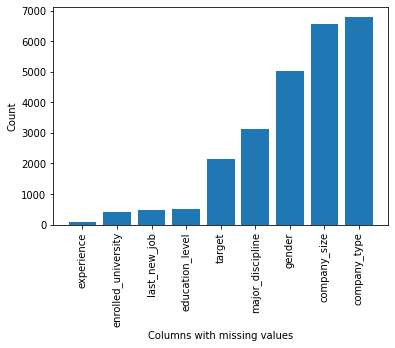

In [ ]:



df_dropped_columns = df_data.drop(['state', 'training_hours', 'rec_num', 'enrollee_id', 'relevent_experience', 'city_development_index', 'city', 'city_development_matrics'], axis=1)
columns_missing_values = df_dropped_columns.isnull().sum()
columns_missing_values.sort_values(inplace = True, ascending = True)

y = list(columns_missing_values)
x = ['experience', 'enrolled_university', 'last_new_job', 'education_level', 'target', 'major_discipline', 'gender', 'company_size', 'company_type']

plt.bar(x,y);
plt.xticks(rotation = 90);
plt.xlabel('Columns with missing values');
plt.ylabel('Count');





> IV. Use missingno’s bar plot, matrix plot with 200 sample, and heatmap.



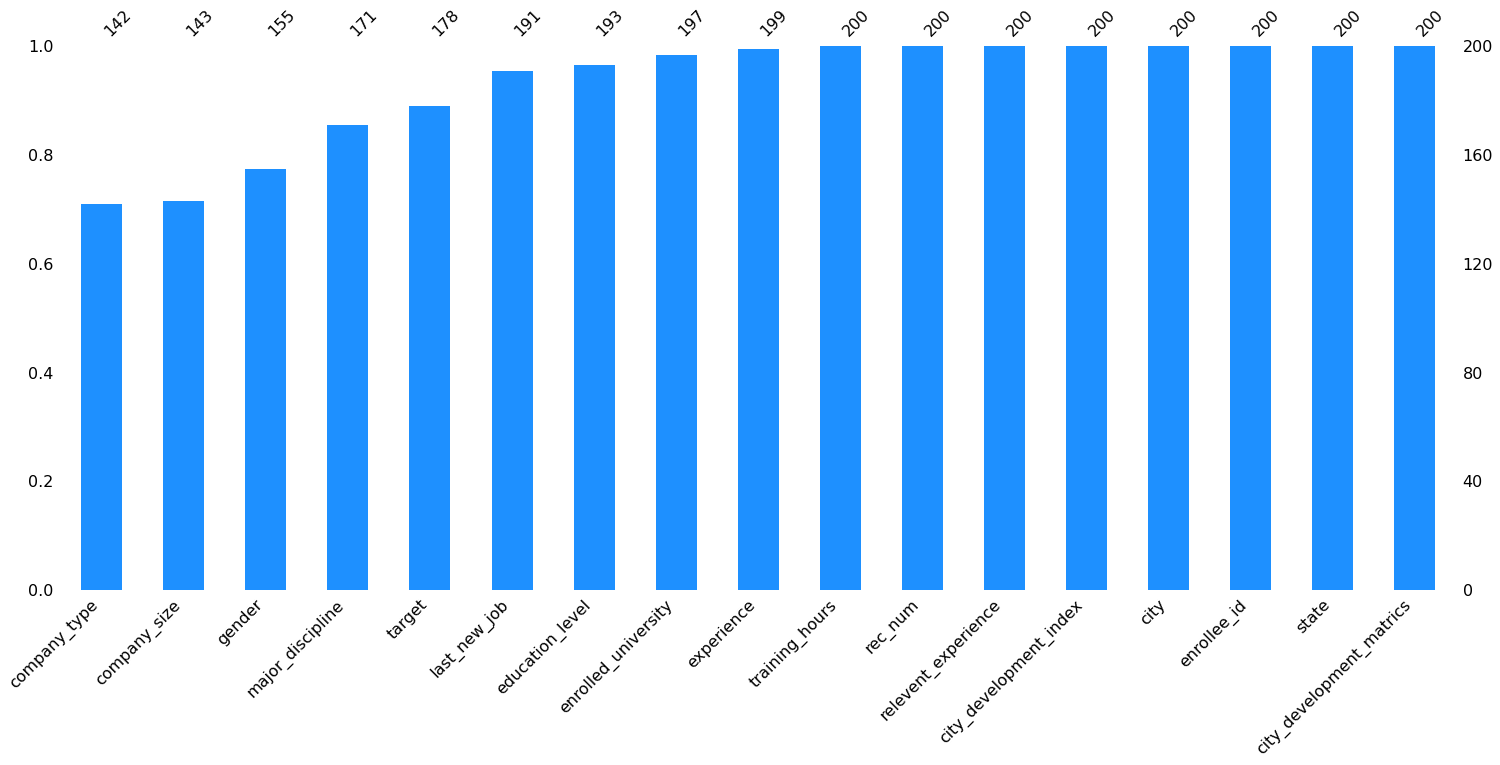

In [ ]:
msno.bar(df_data.sample(200),  color="dodgerblue", sort="ascending");

Looking at the plot, about half of the features are not complete and are missing data. No need to drop the company type feature since we are not missing 60% of its data. 

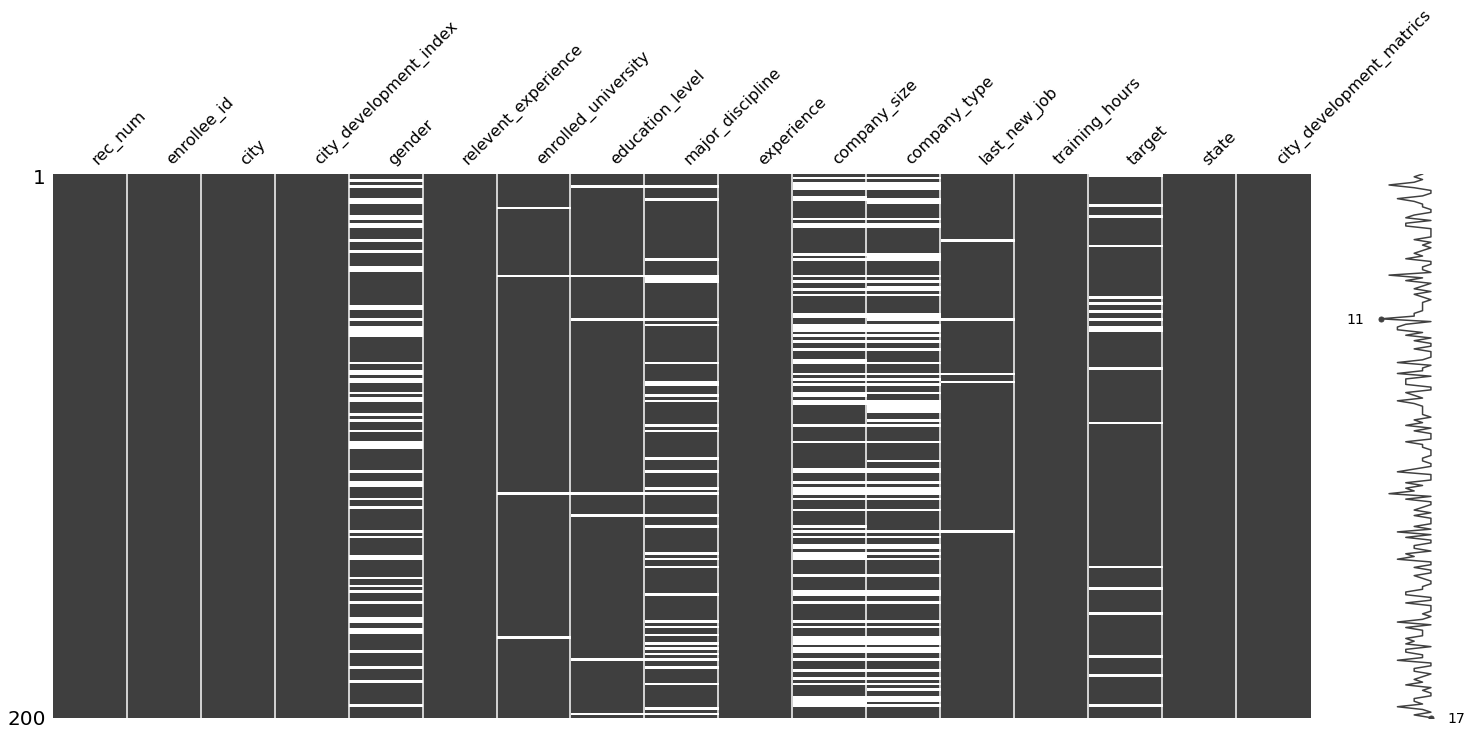

In [ ]:
msno.matrix(df_data.sample(200));

In the matrix plot gender, company size, and company type have the most null values compared to the other columns in the dataframe.

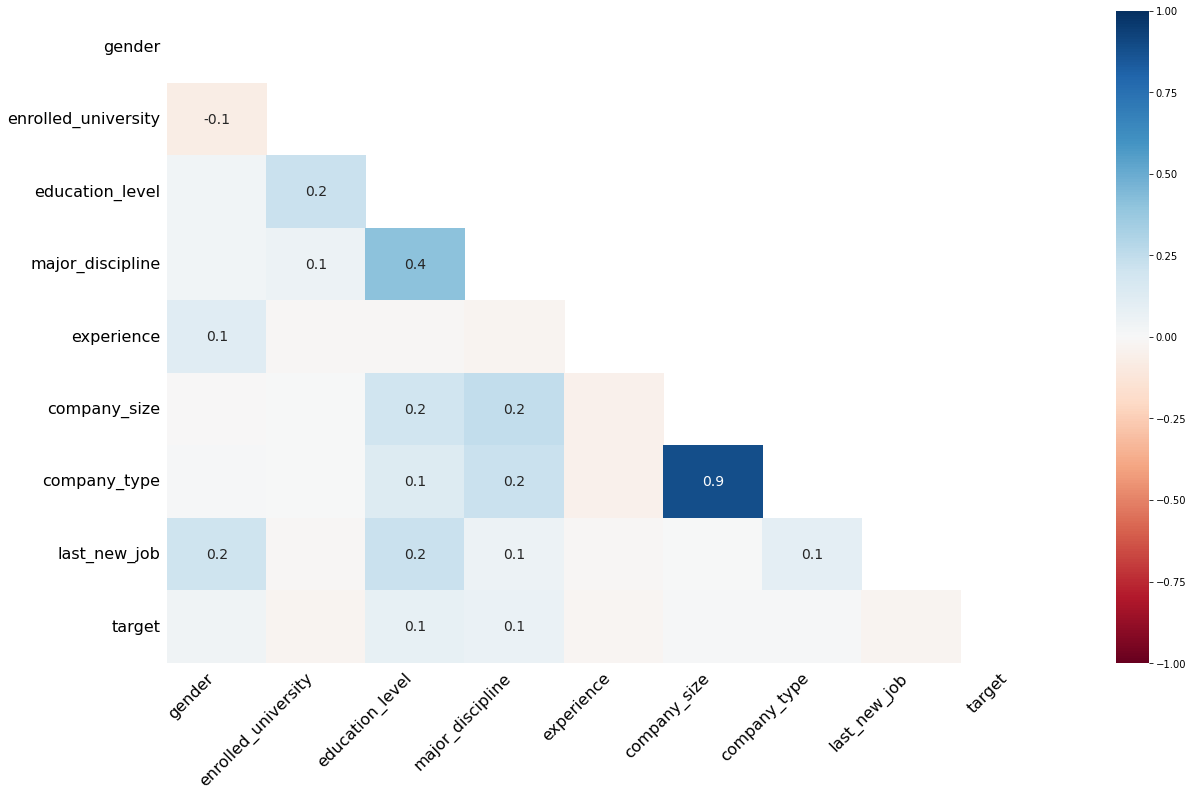

In [ ]:
msno.heatmap(df_data.sample(200));

Interpret any interesting information you found in the heatmap and any one plot

* The absence of last new job data is slightly positively correlated with missing values in gender, education level, company type and experience.
* Looking at company type, its absence is highly positively correlated with null values in company size.
* target is slightly negatively correlated with gender, company type and last new job. 



8. Understanding Categorical attributes (this part may require you to make 20+ plots ) [26 pts]






> I. For each categorical attribute perform the following:







> I. Use seaborn bar plot for the categorical feature to see different values and count




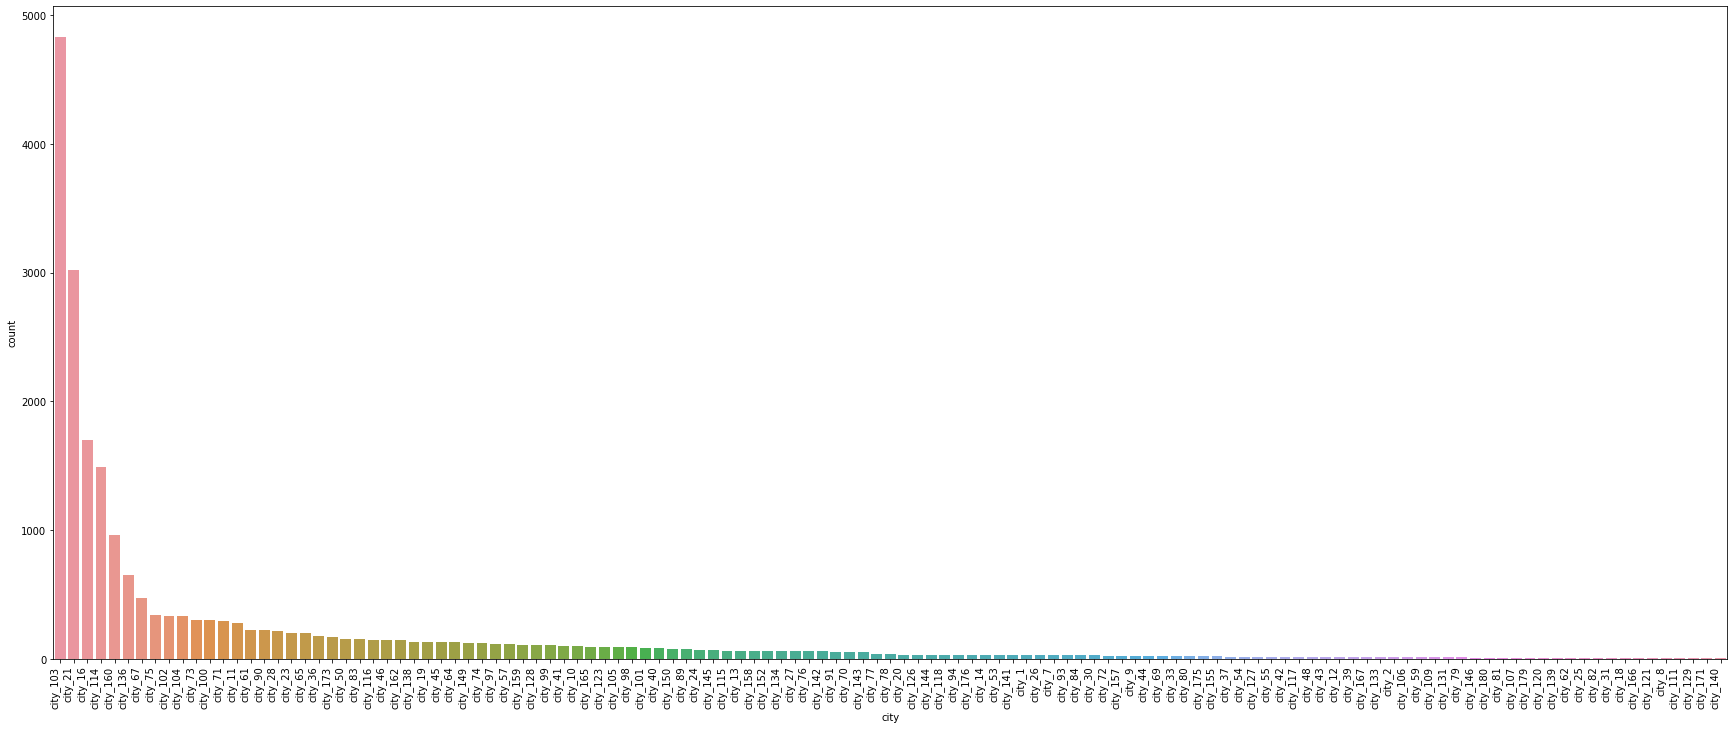

In [ ]:
plt.figure(figsize = (30,12))
ax = sns.barplot(x = list(df_data['city'].value_counts().keys()), y=list(df_data['city'].value_counts()));

ax.set(xlabel = 'city' , ylabel = 'count');

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right');



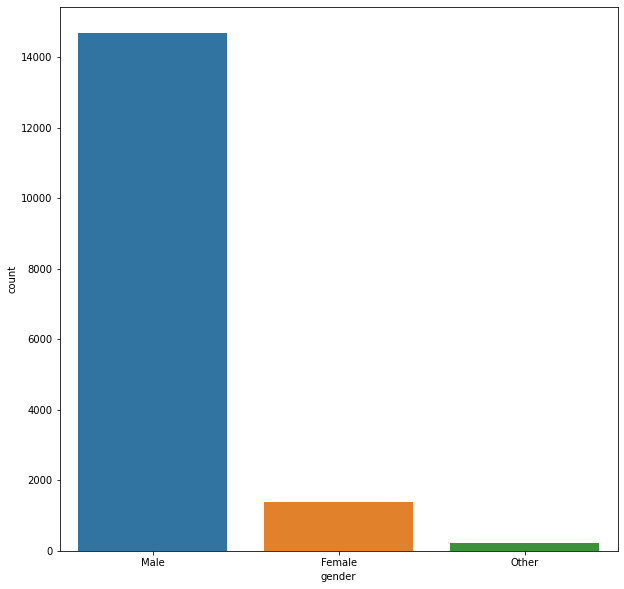

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['gender'].value_counts().keys()), y=list(df_data['gender'].value_counts()));
ax.set(xlabel = 'gender' , ylabel = 'count');

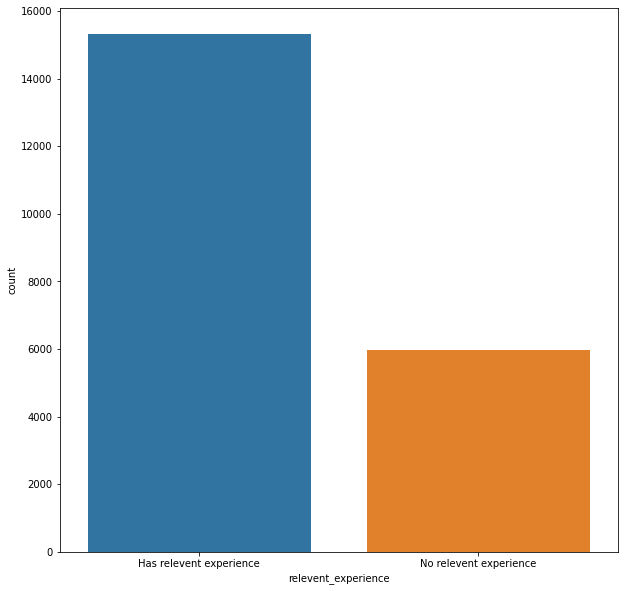

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['relevent_experience'].value_counts().keys()), y=list(df_data['relevent_experience'].value_counts()));
ax.set(xlabel = 'relevent_experience' , ylabel = 'count');

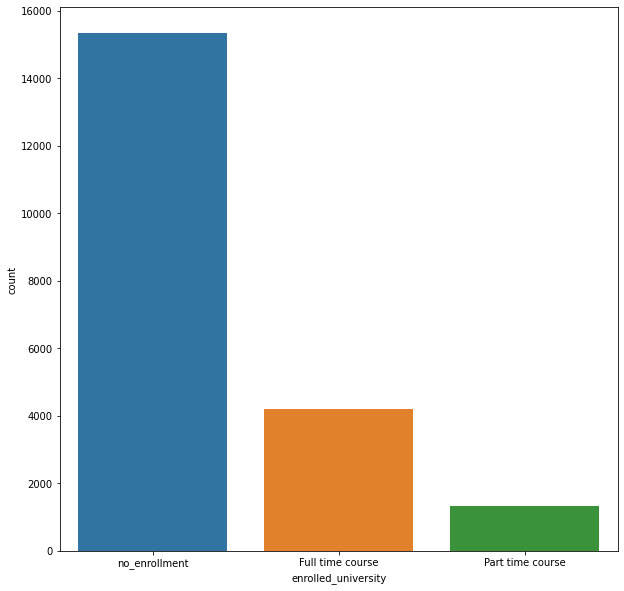

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['enrolled_university'].value_counts().keys()), y=list(df_data['enrolled_university'].value_counts()));
ax.set(xlabel = 'enrolled_university' , ylabel = 'count');

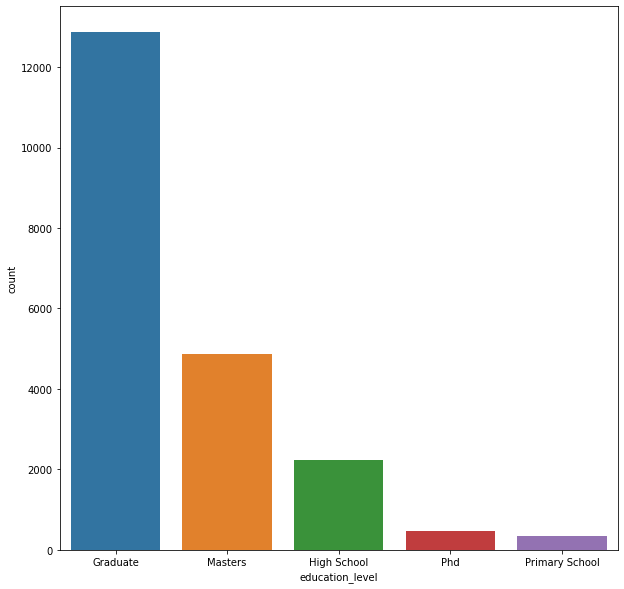

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['education_level'].value_counts().keys()), y=list(df_data['education_level'].value_counts()));
ax.set(xlabel = 'education_level' , ylabel = 'count');

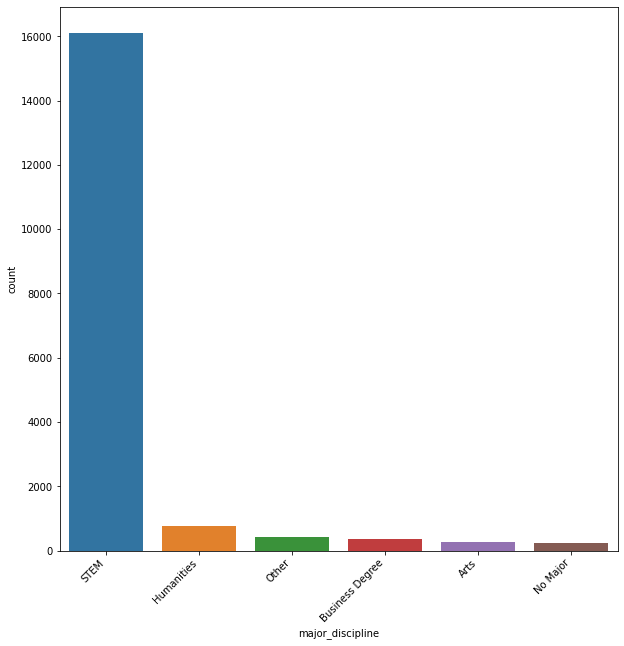

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['major_discipline'].value_counts().keys()), y=list(df_data['major_discipline'].value_counts()));
ax.set(xlabel = 'major_discipline' , ylabel = 'count');

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

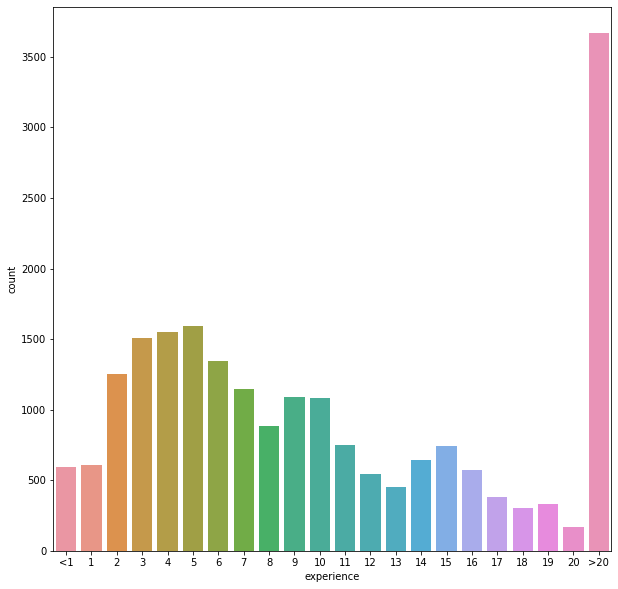

In [ ]:
plt.figure(figsize = (10,10))
xorder = ['<1']

for i in range (1,21):
  xorder.append(str(i))
xorder.append('>20')

ax = sns.barplot(x = list(df_data['experience'].value_counts().keys()), y=list(df_data['experience'].value_counts()), order = xorder);
ax.set(xlabel = 'experience' , ylabel = 'count');

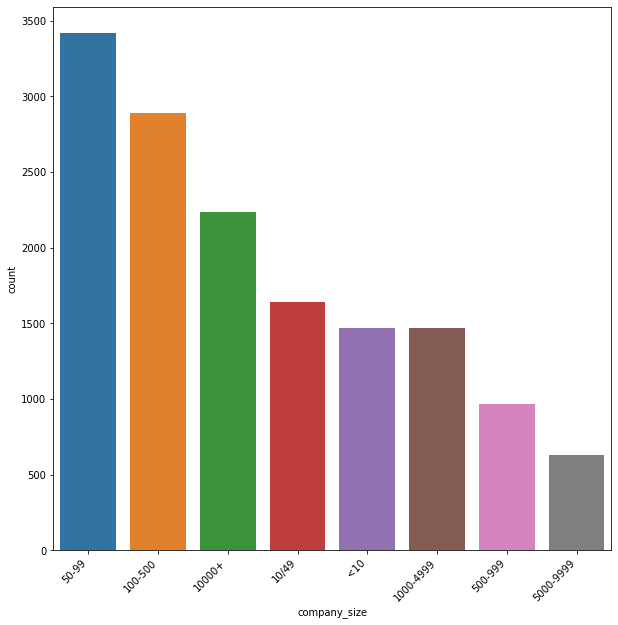

In [ ]:
plt.figure(figsize = (10,10))

ax = sns.barplot(x = list(df_data['company_size'].value_counts().keys()), y=list(df_data['company_size'].value_counts()));
ax.set(xlabel = 'company_size' , ylabel = 'count');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

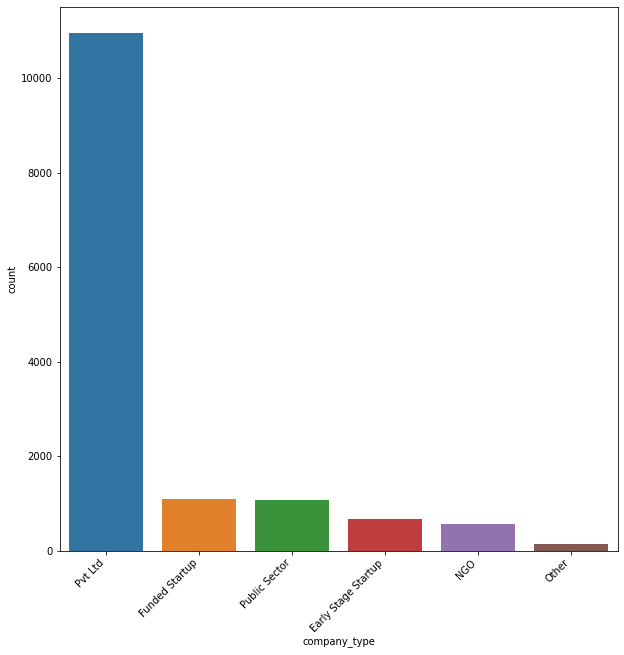

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['company_type'].value_counts().keys()), y=list(df_data['company_type'].value_counts()));
ax.set(xlabel = 'company_type' , ylabel = 'count');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

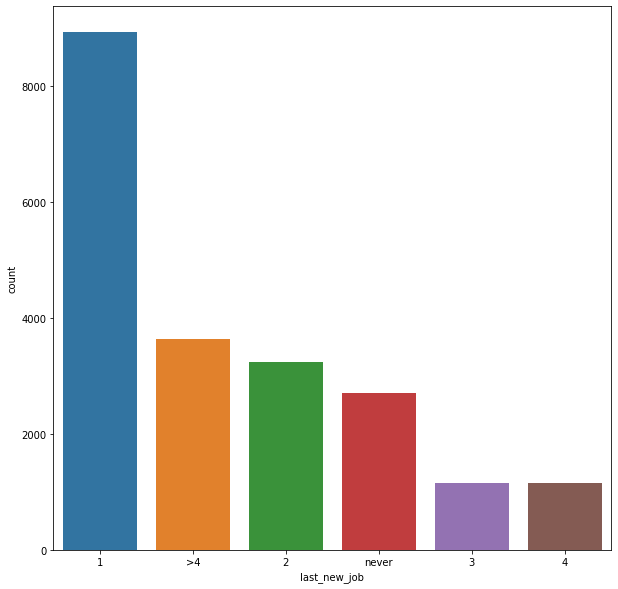

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = list(df_data['last_new_job'].value_counts().keys()), y=list(df_data['last_new_job'].value_counts()));
ax.set(xlabel = 'last_new_job' , ylabel = 'count');

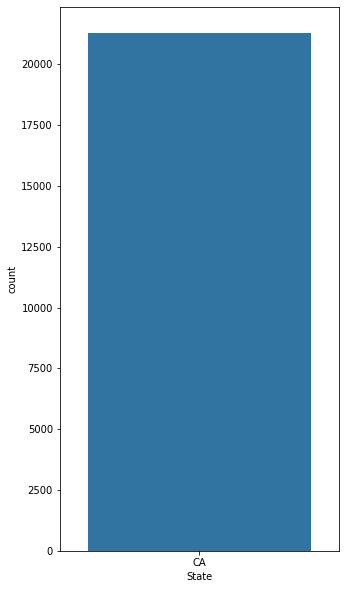

In [ ]:
plt.figure(figsize = (5,10))
ax = sns.barplot(x = list(df_data['state'].value_counts().keys()), y=list(df_data['state'].value_counts()));
ax.set(xlabel = 'State' , ylabel = 'count');



> II. Use seaborn countplot for the categorical feature against the values of the target


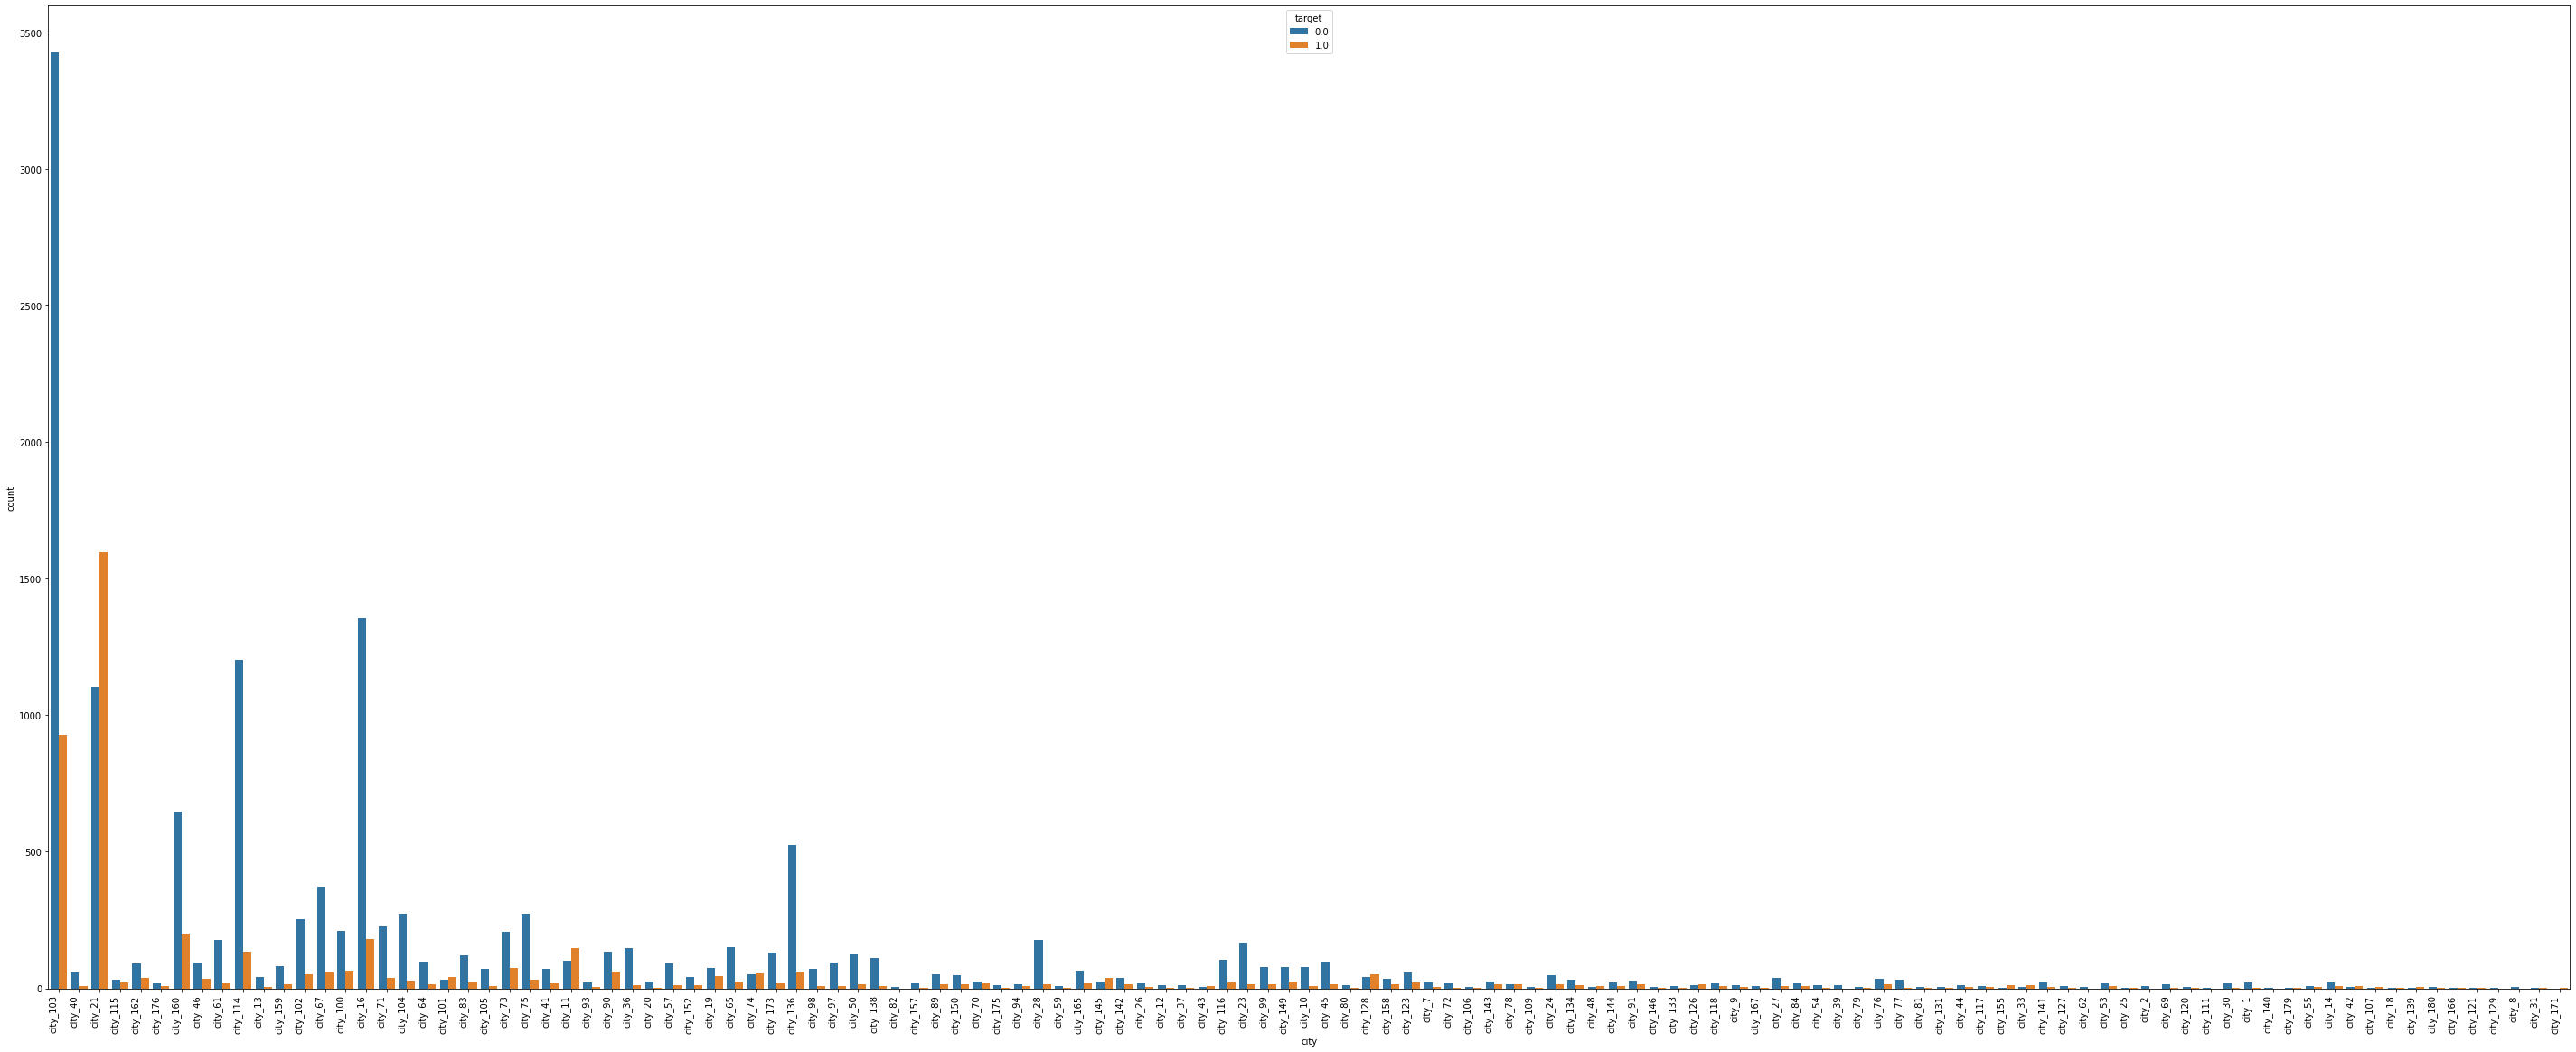

In [ ]:
 plt.figure(figsize = (50,20))
 ax = sns.countplot(x="city", hue="target", data=df_data);

 ax.set(xlabel = 'city' , ylabel = 'count');
 ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right');

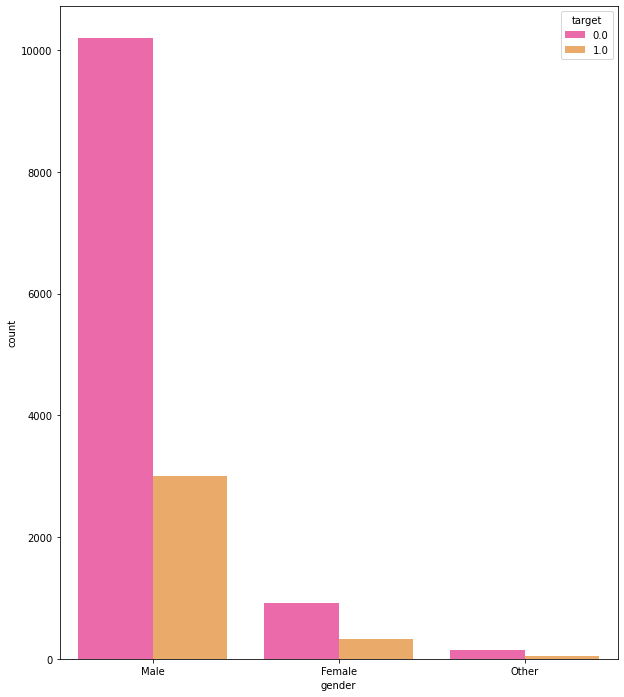

In [ ]:
plt.figure(figsize = (10,12))
sns.countplot(x="gender", hue="target", data=df_data, palette="spring");

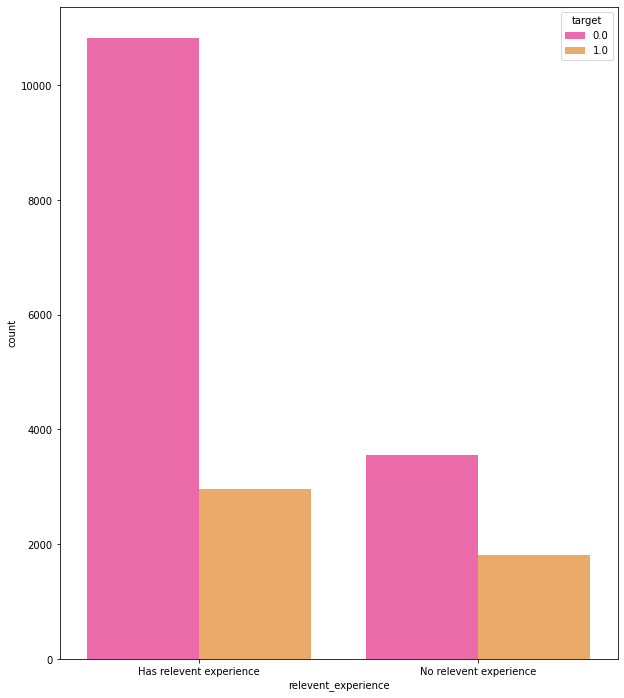

In [ ]:
plt.figure(figsize = (10,12))
sns.countplot(x="relevent_experience", hue="target", data=df_data, palette="spring");

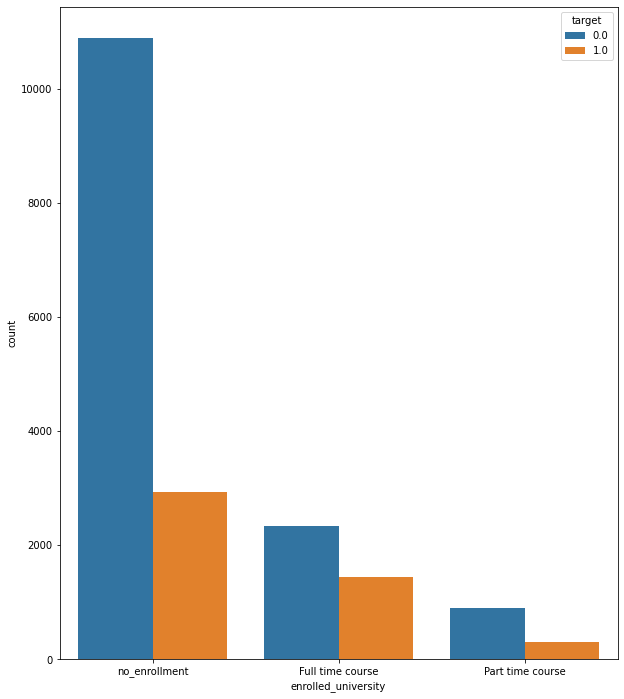

In [ ]:
plt.figure(figsize = (10,12))
sns.countplot(x="enrolled_university", hue="target", data=df_data);

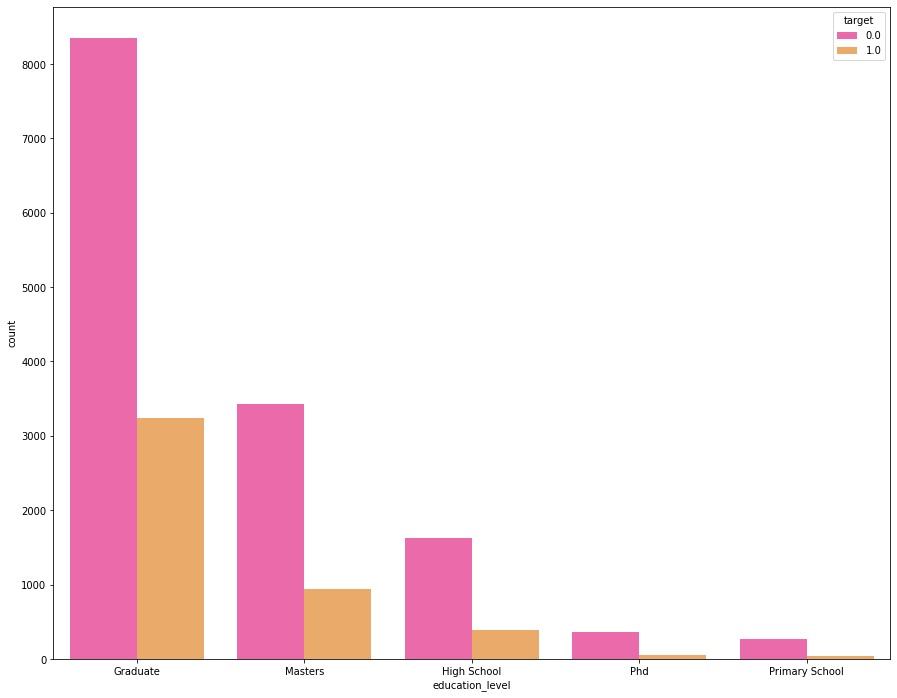

In [ ]:
plt.figure(figsize = (15,12))
sns.countplot(x="education_level", hue="target", data=df_data, palette="spring");

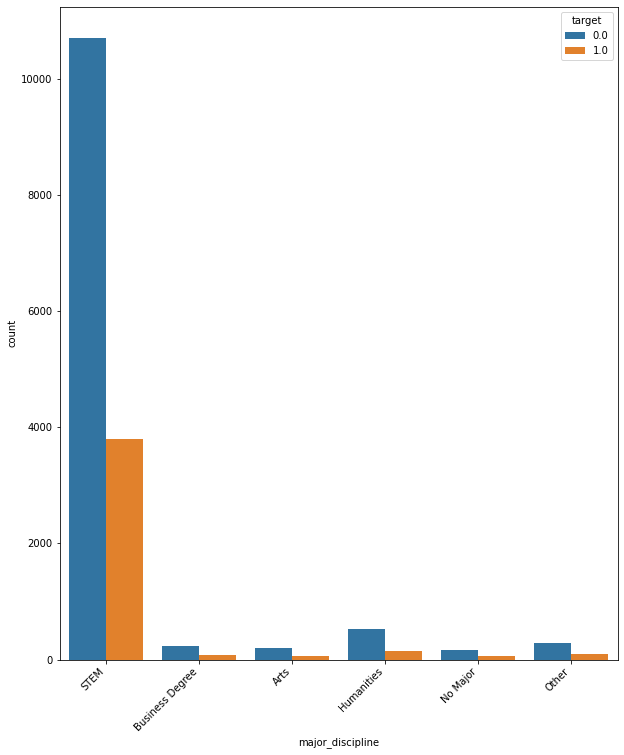

In [ ]:
plt.figure(figsize = (10,12))
ax = sns.countplot(x="major_discipline", hue="target", data=df_data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

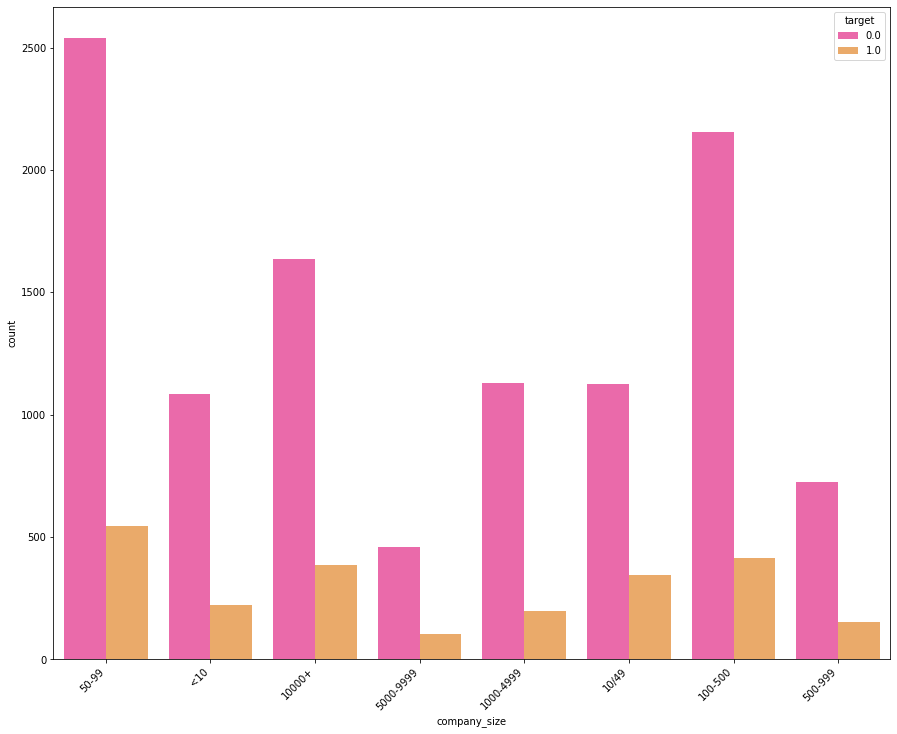

In [ ]:
plt.figure(figsize = (15,12))
ax = sns.countplot(x="company_size", hue="target", data=df_data, palette="spring");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

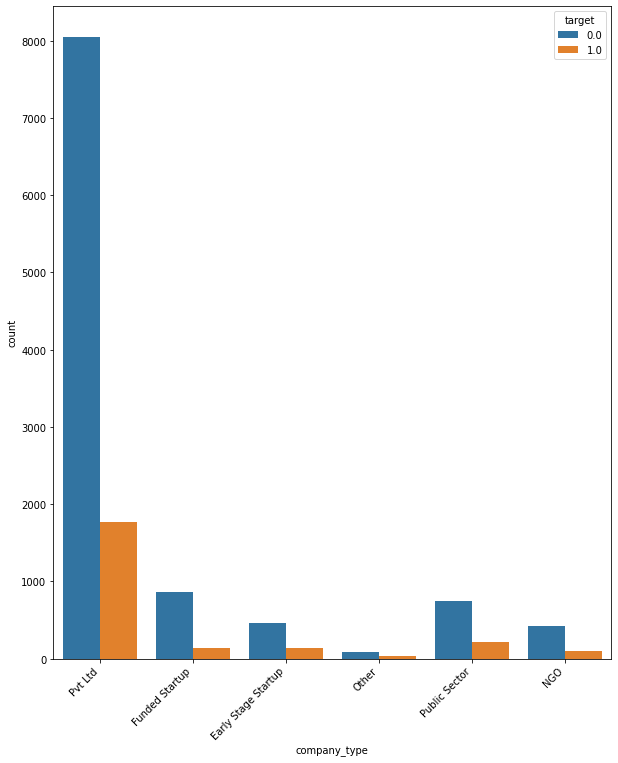

In [ ]:
plt.figure(figsize = (10,12))
ax = sns.countplot(x="company_type", hue="target", data=df_data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

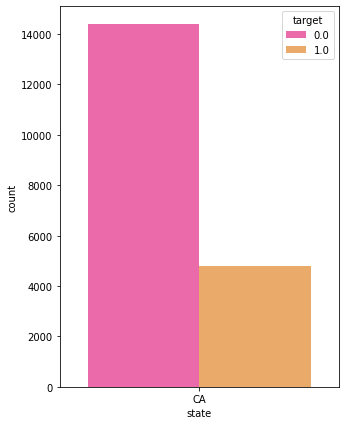

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x="state", hue="target", data=df_data, palette="spring");



> III. Interpret any interesting information and any information that might help you to make any decision on combining, removing, or adding features based on that, or any resampling maybe needed.

I would remove the state feature since every state in the state column was california so there is no need to visually represent the state column. I would also remove rec_num since there is already an index in the dataframe.



9. Understanding Numerical attributes (16 pts)







> I. Plot their distributions using histogram



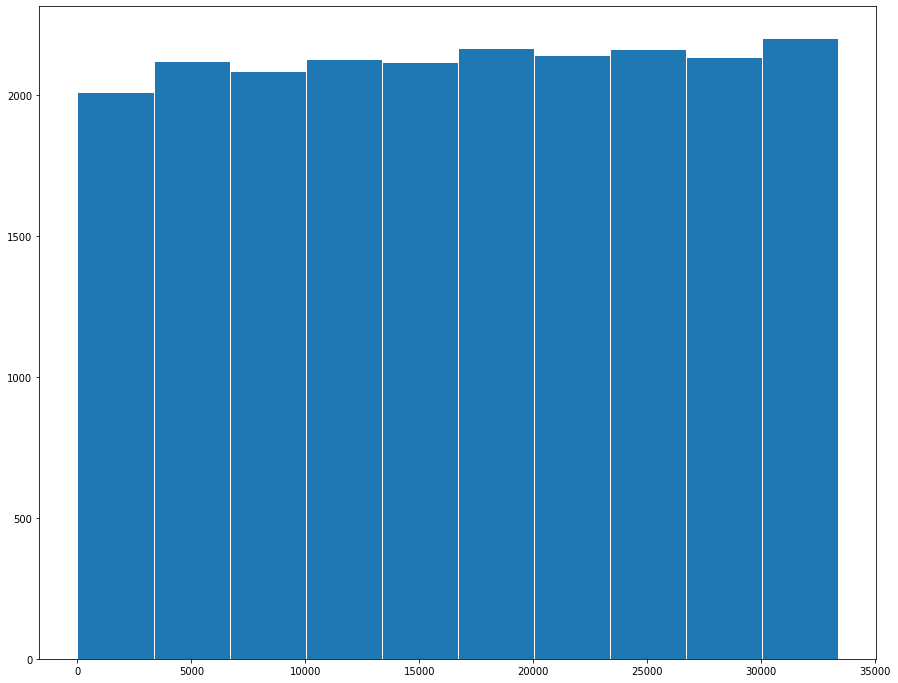

In [ ]:
plt.figure(figsize = (15,12))
plt.hist(df_data['enrollee_id'], ec = "white");

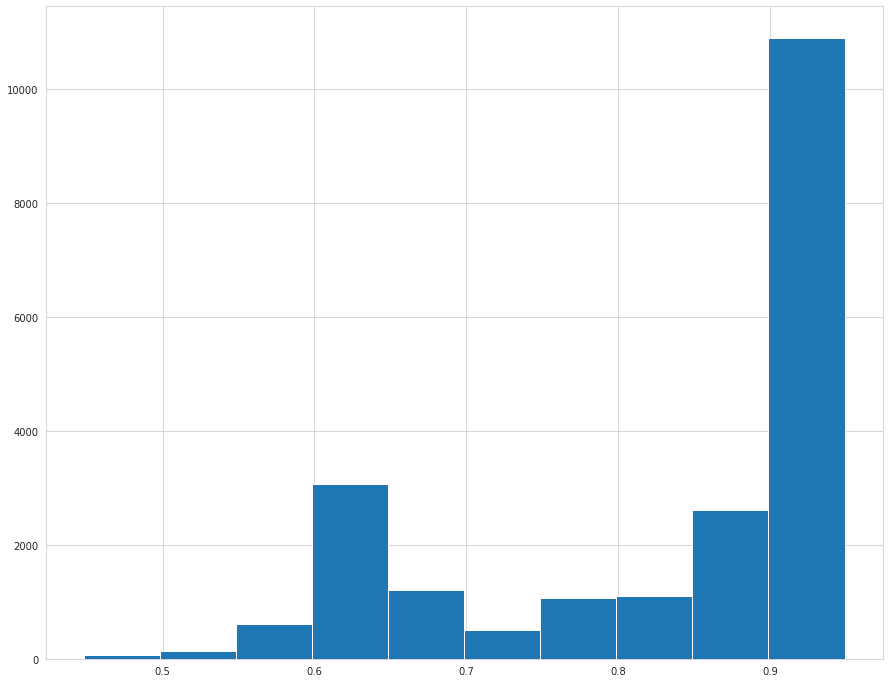

In [ ]:
plt.figure(figsize = (15,12))

sns.set_style("whitegrid")
plt.hist(df_data['city_development_index'], ec = "white");

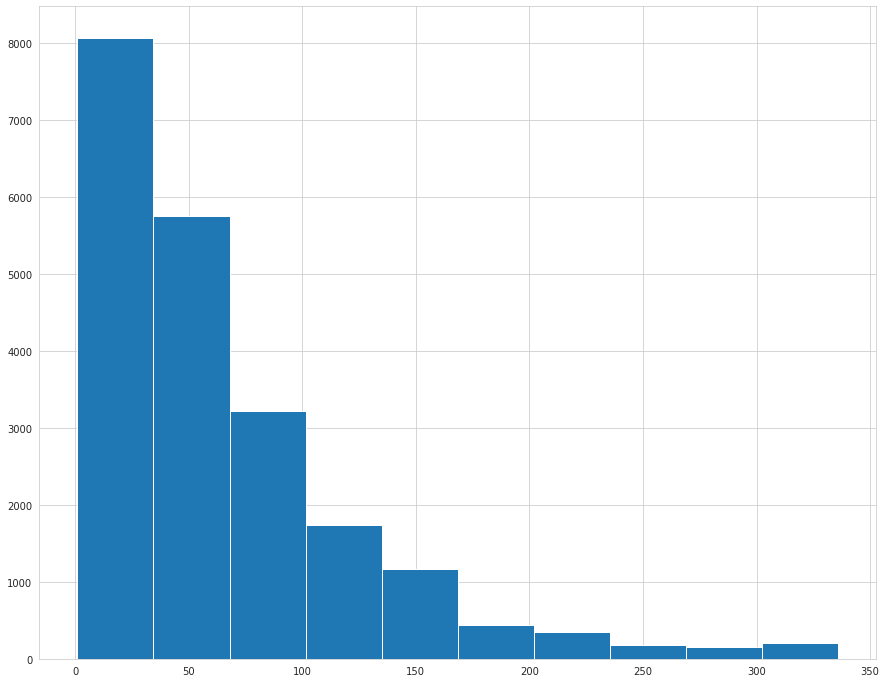

In [ ]:
plt.figure(figsize = (15,12))
plt.hist(df_data['training_hours'], ec = "white");

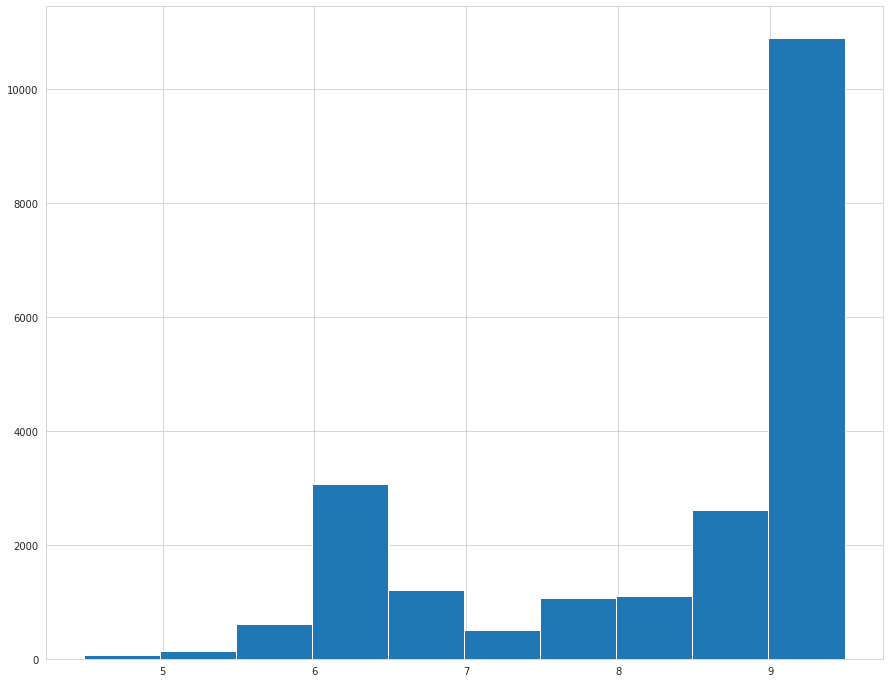

In [ ]:
plt.figure(figsize = (15,12))
plt.hist(df_data['city_development_matrics'], ec = "white");



> II. Plot the distribution using seaborn distplot



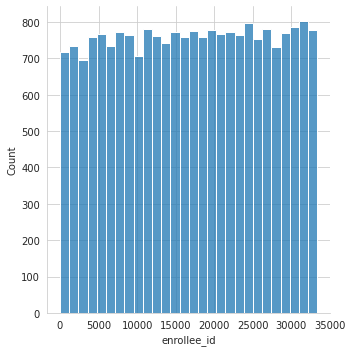

In [ ]:
sns.displot(df_data['enrollee_id'], ec = "white");

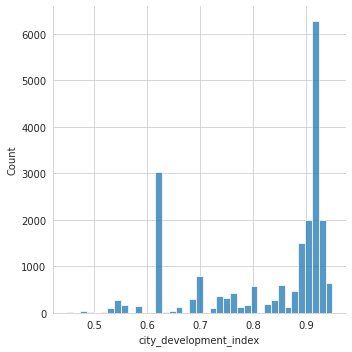

In [ ]:
sns.displot(df_data['city_development_index'], ec = "white");


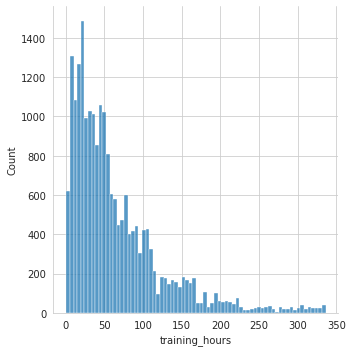

In [ ]:
sns.displot(df_data['training_hours'], ec = "white");

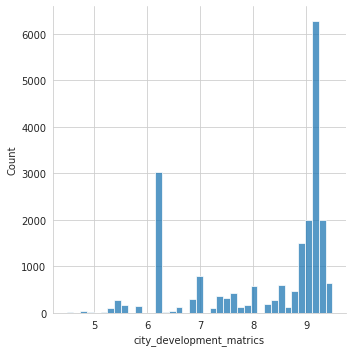

In [ ]:
sns.displot(df_data['city_development_matrics'], ec = "white");



> III. Interpret any interesting information

Training hours is heavily skewed to the right since many people do not train for a long time. In this instance the mean training hours is greater than the median training hours. The data set's lower bounds are extremely low relative to the rest of the data. I will fill in missing data using the median to handle outliers and attempt to fix the distribution.

For city development matrices and city development index it is skewed to the left since the data set's upper bounds are extremely high relative to the rest of the data. In this cause the mean is less than the  median in the distribution. I will fill in missing data using the mode to handle outliers and fix the distribution.

Enrolle_id is almost even distributed.

10. Correlation: (15 pts)



> I. For the numerical attributes, use heatmap to show the correlation



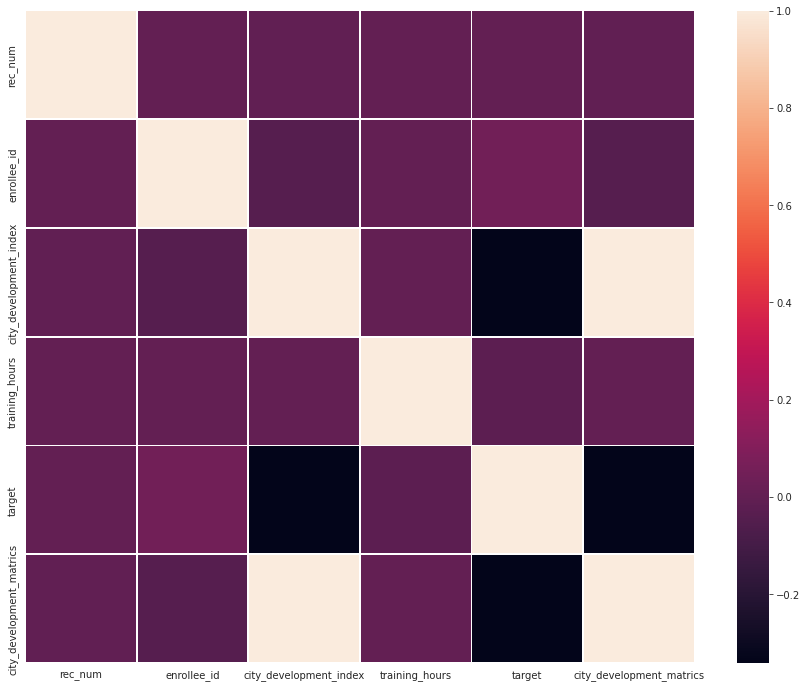

In [ ]:
plt.figure(figsize = (15,12))
correlation = numerical_columns.corr()
sns.heatmap(correlation, linewidths=.75);




> II. If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well



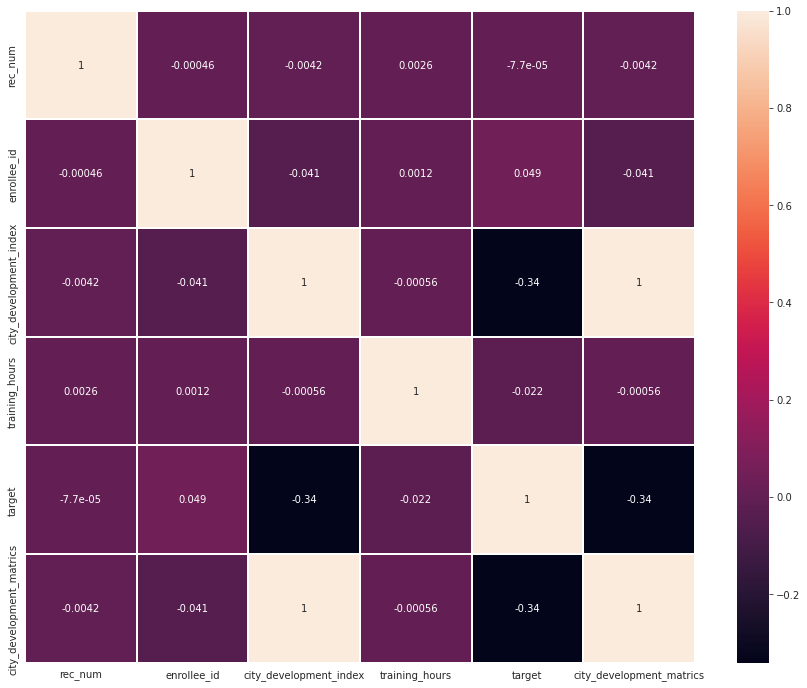

In [ ]:
plt.figure(figsize = (15, 12))
heat_map = sns.heatmap( correlation, linewidth = 1 , annot = True)



> III. Show scatter plots between columns to show the relationships with the target

So the city development index/matrics and training hours are all slightly negatively correlated with the target since people from well development are not looking to get a job change after receive training from the company and have already invested hours of their time in the training beforehand.



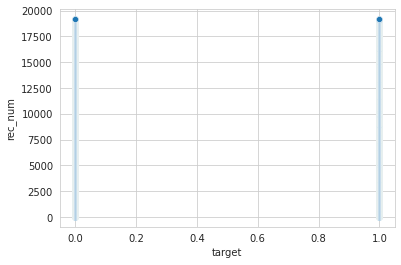

In [ ]:
sns.scatterplot(x=df_data['target'], y= df_data['rec_num'] , data=df_data);


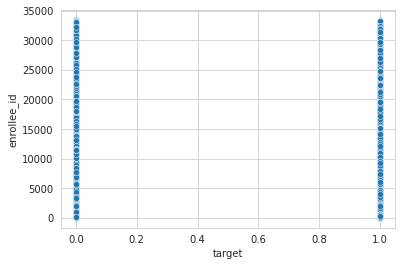

In [ ]:
sns.scatterplot(x=df_data['target'], y= df_data['enrollee_id'] , data=df_data);

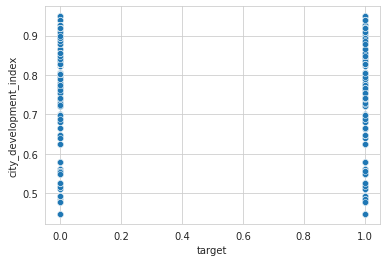

In [ ]:
sns.scatterplot(x=df_data['target'], y= df_data['city_development_index'] , data=df_data);

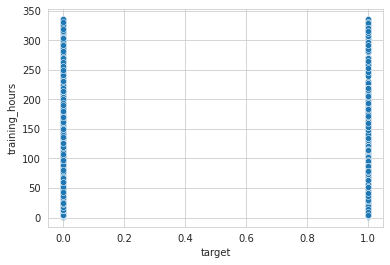

In [ ]:
sns.scatterplot(x=df_data['target'], y= df_data['training_hours'], data = df_data);

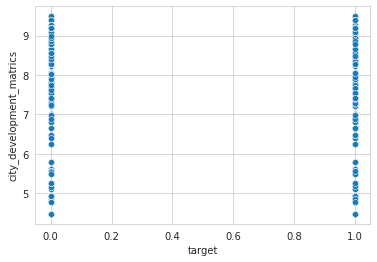

In [ ]:
sns.scatterplot(x=df_data['target'], y= df_data['city_development_matrics'], data = df_data);



> IV. Interpret and explain any finding and next course of action from there
 
 After plotting the correlation of each numerical variable against the target I found that must of the variables are not highly correlated to the target. This means in most cases people are not looking for a job change. The next course of action will be to find outliers in the data.


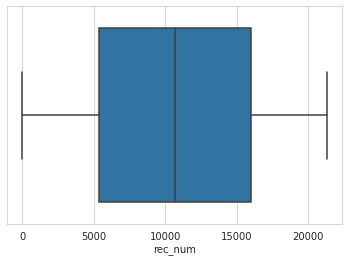

In [ ]:
sns.boxplot(x = df_data["rec_num"]);

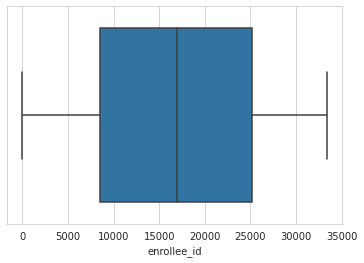

In [ ]:
sns.boxplot(x = df_data["enrollee_id"]);

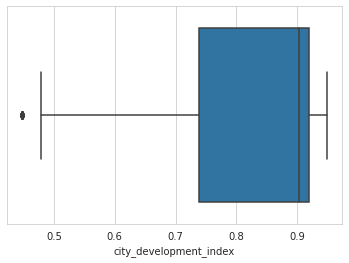

In [ ]:
sns.boxplot(x = df_data["city_development_index"]);

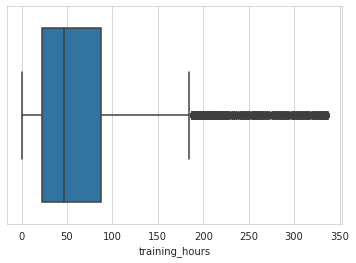

In [ ]:
sns.boxplot(x = df_data["training_hours"]);

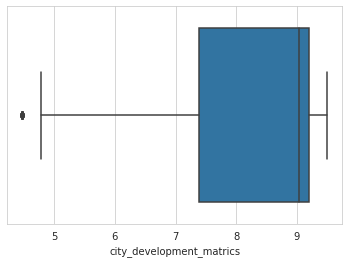

In [ ]:
sns.boxplot(x = df_data["city_development_matrics"]);

insights: 
* training hours is right skewed with many outliers due to the presence of missing values. This column needs to be filled with the median training hours to help fix the distibution.
* city development index/matrics is left skew with some outliers and its missing data needs to filled to help with the distribution 

12. What are the different values of experience, can you categorize them in to 0, 1, and 2? (5 pts)  

Values of experience can be changed to 0 for people with less than 1 year of experience, 1 for people with more than 1 year but less than 20 years and, 2 can be used for people with over 20 years of experience

In [ ]:
df_data['experience'].replace('<1', 0, inplace = True)
df_data['experience'].replace('>20', 21, inplace = True)
df_data['experience'].fillna(0, inplace = True)




In [ ]:
### Here people with <1 experience is denoted by 0
### People with >1 years experience but <20 years experience is denoted by 1
### People with >20 experience is denoted by 2

df_data['experience'].replace(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18','19','20'], 1, inplace = True)
df_data['experience'].replace(21, 2, inplace = True)

df_data['experience'].value_counts().sort_index(ascending = True)


0      666
1    16952
2     3669
Name: experience, dtype: int64

13. Summary and discussion: (15 pts)


> After performing the EDA, I found that certain columns such as rec_num, and state should be removed since there data holds no value in the dataframe. Columns like city_development_index and city_development_matrics should either be combined or one of the columns be removed since they hold pretty much the same data and is causing the data to be skewed. I would also change the target to be a categorical variable rather than an numerical variable. To rebalance the data I would make those changes I previously mentioned but will also delete all the records of people who didnt list company size, company type, and gender becuase those three columns contained the most missing values. Another thing to consider for rebalancing is removing the gender company size and company type features all together since they contain the most missing values and are considered bad features.

* Another thing to add to help with rebalancing the dataset is just filling in the missing values with the median/mode of each column to help handle outliers in the dataset and make the distribution of each columnn be closer to being a normal distribution. Since no column is missing more than 60% of its data there is no need to consider removing the feature all together.



Next steps I will take is filling in missing values and redisplaying columns to see if skewness is fixed 

In [ ]:
missingvalues

company_type                6774
company_size                6560
gender                      5016
major_discipline            3125
target                      2129
education_level              512
last_new_job                 463
enrolled_university          417
experience                    70
state                          0
training_hours                 0
rec_num                        0
enrollee_id                    0
relevent_experience            0
city_development_index         0
city                           0
city_development_matrics       0
dtype: int64

In [ ]:
#=======================================================================================
# Replacing categorical data with mode :
#=======================================================================================

df_data["company_type"] = df_data['company_type'].fillna(df_data['company_type'].mode()[0])
df_data["company_size"] = df_data['company_size'].fillna(df_data['company_size'].mode()[0])
df_data["gender"] = df_data['gender'].fillna(df_data['gender'].mode()[0])
df_data["major_discipline"] = df_data['major_discipline'].fillna(df_data['major_discipline'].mode()[0])
df_data["education_level"] = df_data['education_level'].fillna(df_data['education_level'].mode()[0])
df_data["last_new_job"] = df_data['last_new_job'].fillna(df_data['last_new_job'].mode()[0])
df_data["enrolled_university"] = df_data['enrolled_university'].fillna(df_data['enrolled_university'].mode()[0])
df_data["gender"] = df_data['gender'].fillna(df_data['gender'].mode()[0])

In [ ]:
#=======================================================================================
# Replacing numerical data with mode :
#=======================================================================================

# I noticed that experience and target will be filled with the mode since most candidates would have 
# >1 years experience but <20 years experience denoted by a 1 
# and that candidates most frequently opted out of looking for a new job after training
# Keep these two features in this cell since they are numerical features
# also other numerical features that I thought had missing data ended up not having missing data

df_data["target"] = df_data['target'].fillna(df_data['target'].mode()[0])
df_data["experience"] = df_data['experience'].fillna(df_data['experience'].mode()[0])

In [ ]:
print(df_data.isnull().sum())

rec_num                     0
enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0
state                       0
city_development_matrics    0
dtype: int64


Previously stated that training hours and city development index may need to filled with the median values but I was assumpting there was missing data in those columns. New I will use the PowerTransformer, QuantileTransformer, Log function, Square Root Transform, and Box-Cox Transform functions to help remove any skewness in the columns containing numerical data. 

['rec_num' 'enrollee_id' 'city_development_index' 'training_hours'
 'target' 'city_development_matrics']

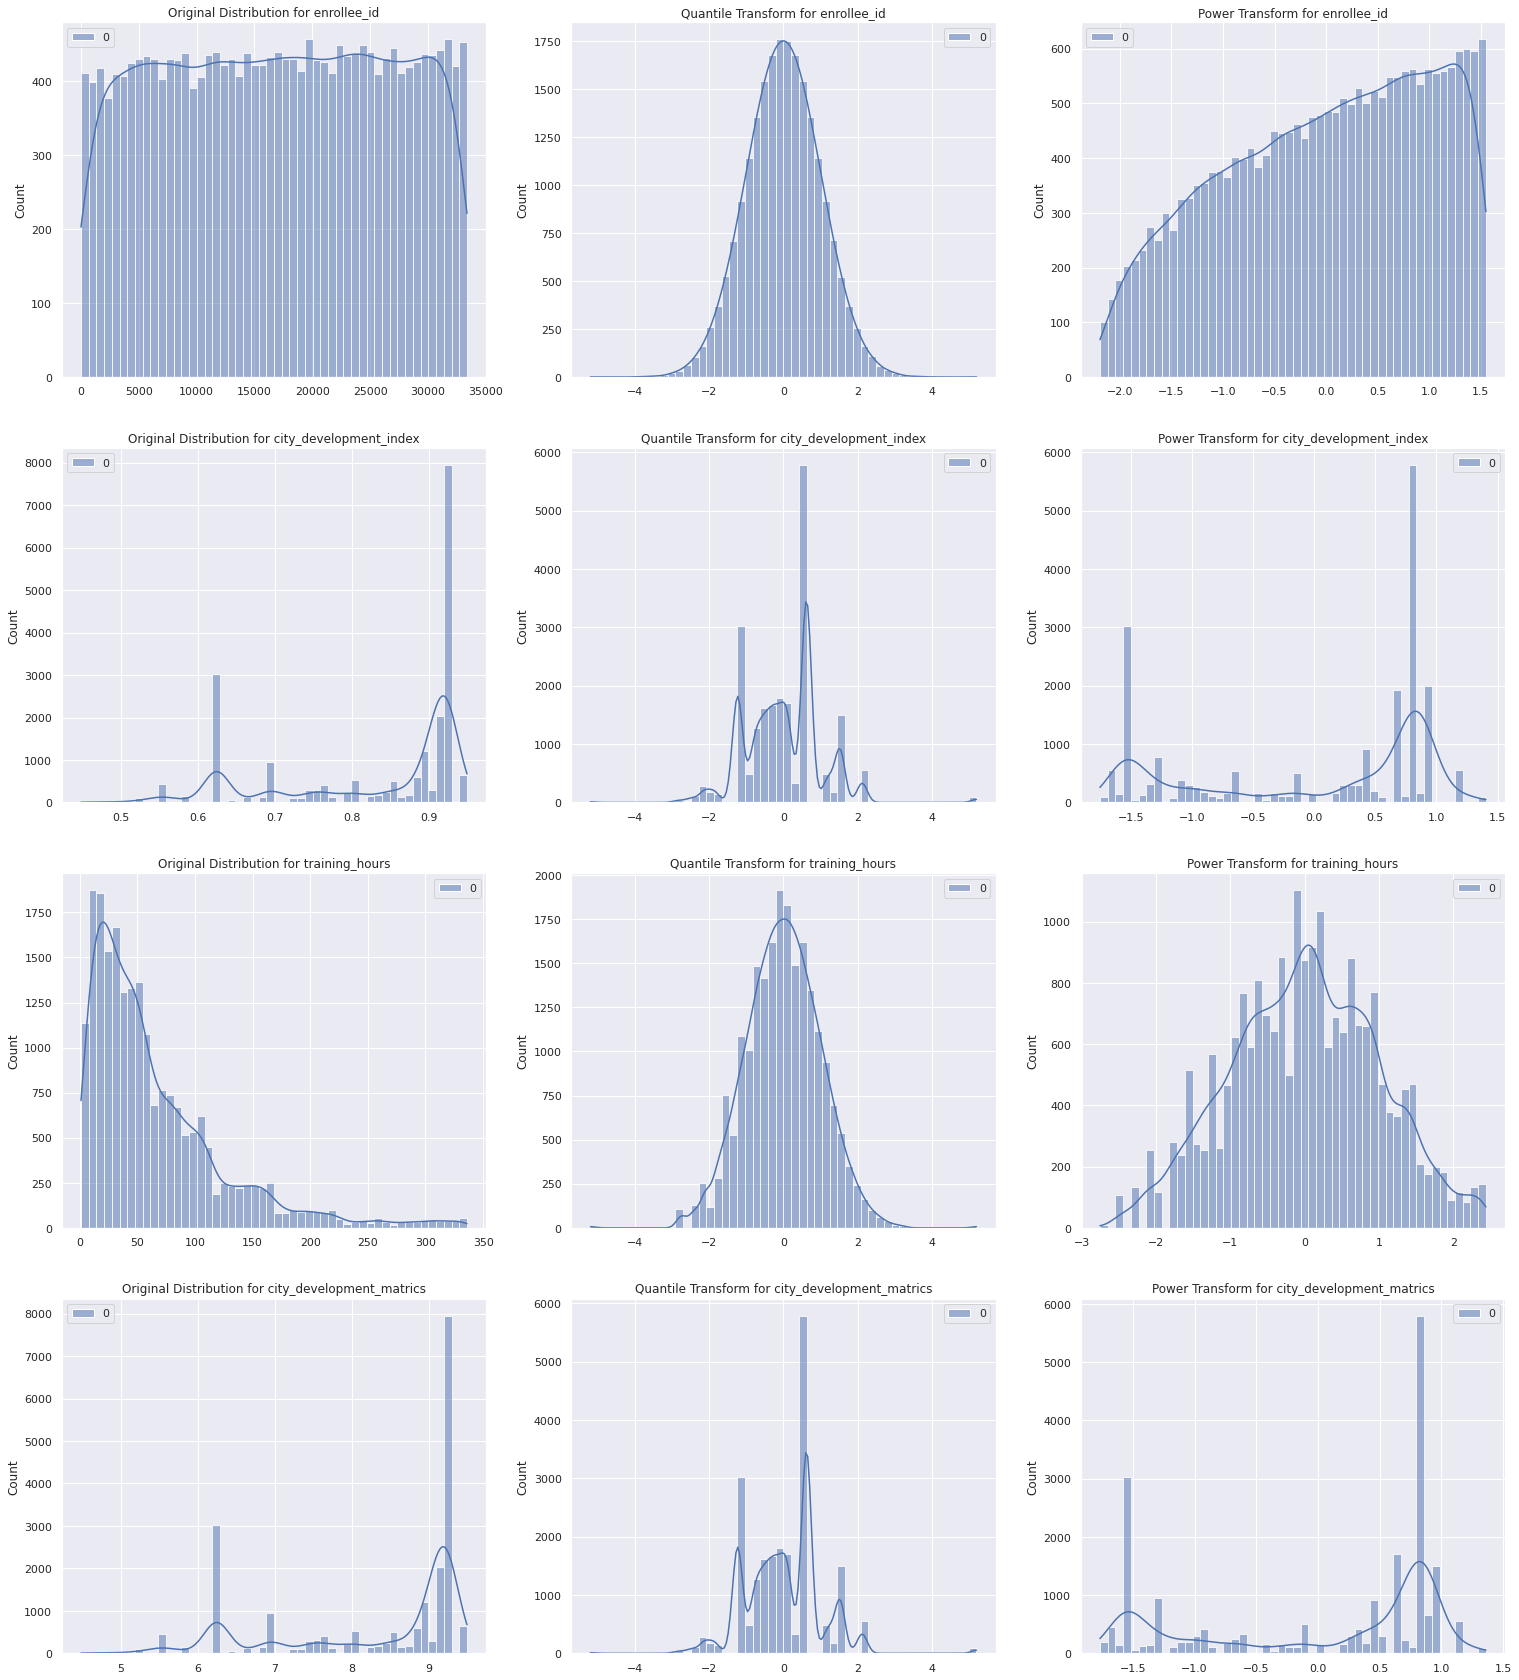

In [ ]:
# Function that tests the data frame columns using PowerTransformer and PowerTransformer

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(35,30))
    j = 1
    for i in columns:
        array = np.array(df_data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(4,4,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(4,4,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(4,4,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 4
test_transformers(df_data[['enrollee_id', 'city_development_index' ,'training_hours', 'city_development_matrics']])


Insights:
* QuantileTransformer performed better across the board compared to PowerTransformer due to the large size of the dataset.

* Training hours was able to be converted to a normal distribution using quantile transformer but city develop index/matrics using not completely converted.

Now I will use the log function, sqrt function and box-cox function to measure skewness.

In [ ]:
from scipy import stats

In [ ]:
df_data['enrollee_id'].skew()

-0.018072650068534507

In [ ]:
enrollee_id_log = np.log(df_data['enrollee_id'])
enrollee_id_log.skew()

-2.0640054791875966

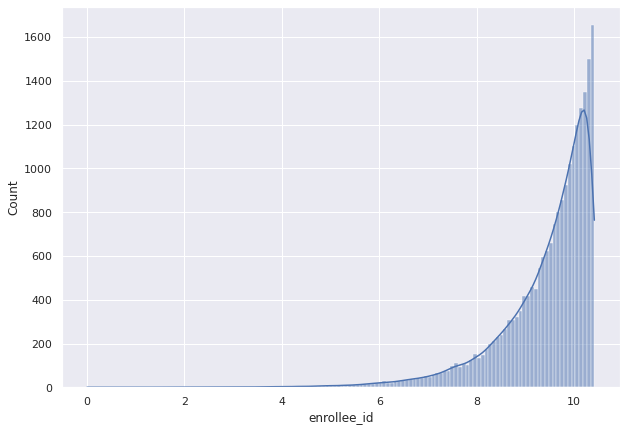

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=enrollee_id_log, kde=True)

In [ ]:
enrollee_id_sqrt = np.sqrt(df_data['enrollee_id'])
enrollee_id_sqrt.skew()

-0.5860377804989639

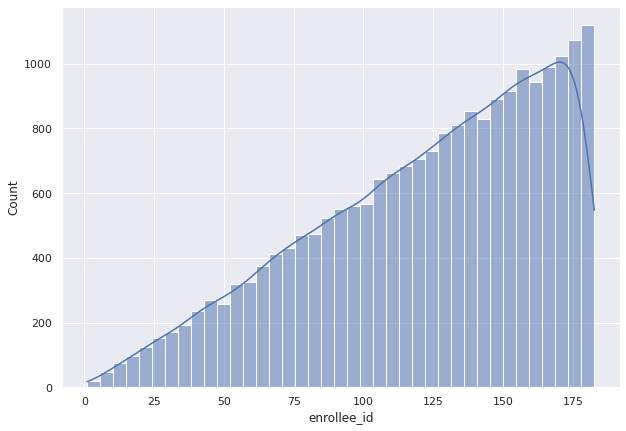

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=enrollee_id_sqrt, kde=True)

In [ ]:
enrollee_id_boxcox = stats.boxcox(df_data['enrollee_id'])[0]
pd.Series(enrollee_id_boxcox).skew()

-0.29408965977365864

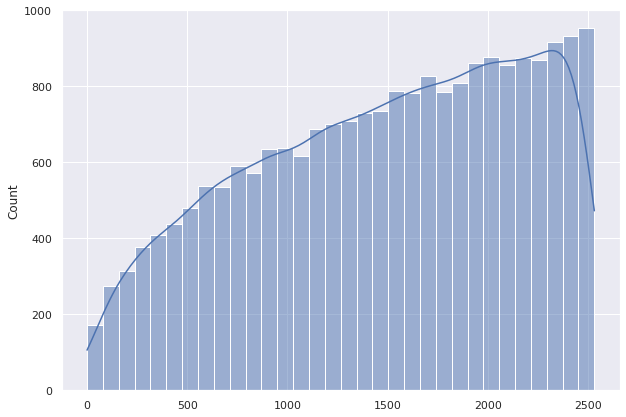

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=enrollee_id_boxcox, kde=True)

Insights:
* Since enrollee_id was already close to normal to begin with, using the quantile transformer or its original distribution is sufficient

In [ ]:
df_data['city_development_index'].skew()

-0.9879778090778645

In [ ]:
city_development_index_log = np.log(df_data['city_development_index'])
city_development_index_log.skew()

-1.1227059424480939

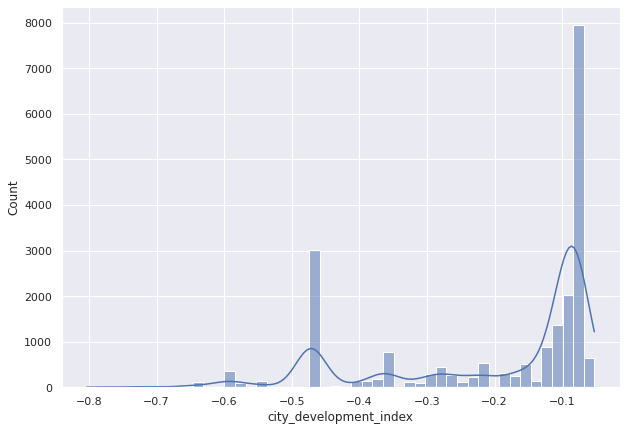

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_index_log, kde=True)

In [ ]:
city_development_index_sqrt = np.sqrt(df_data['city_development_index'])
city_development_index_sqrt.skew()

-1.0511333763584585

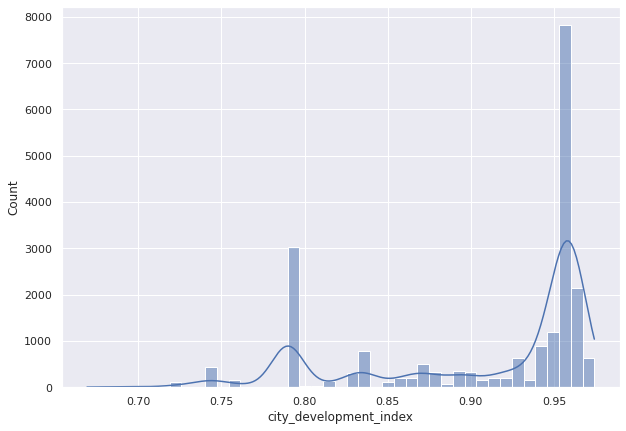

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_index_sqrt, kde=True)

In [ ]:
city_development_index_boxcox = stats.boxcox(df_data['city_development_index'])[0]
pd.Series(city_development_index_boxcox).skew()

-0.5962989498376889

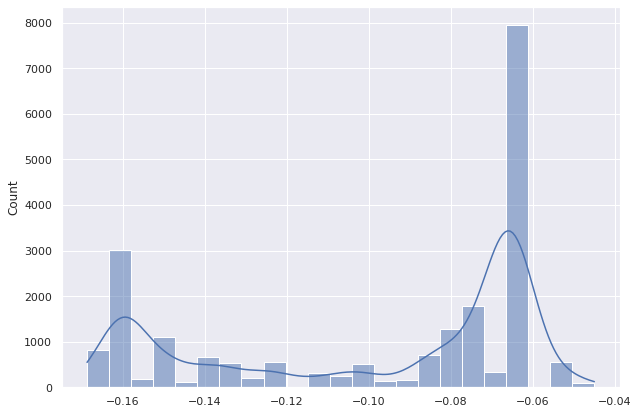

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_index_boxcox, kde=True)

In [ ]:
df_data['city_development_matrics'].skew()

-0.9879778090778616

In [ ]:
city_development_matrics_log = np.log(df_data['city_development_matrics'])
city_development_matrics_log.skew()

-1.1227059424480832

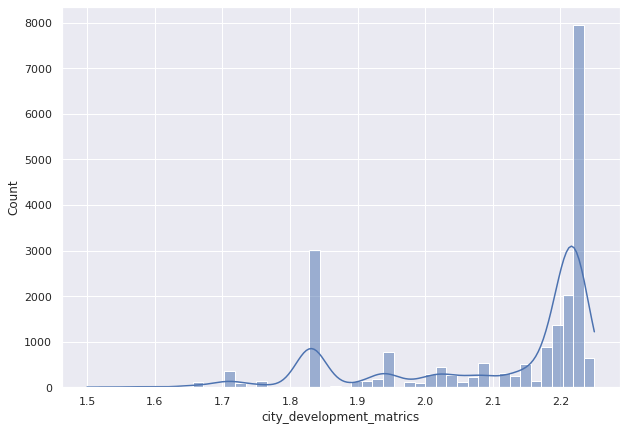

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_matrics_log, kde=True)

In [ ]:
city_development_matrics_sqrt = np.sqrt(df_data['city_development_matrics'])
city_development_matrics_sqrt.skew()

-1.051133376358455

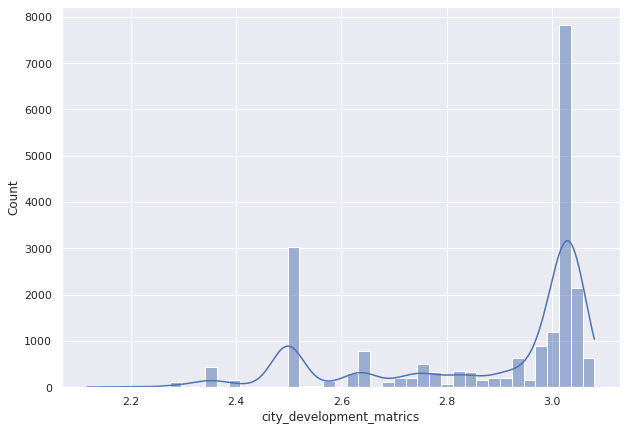

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_matrics_sqrt, kde=True)

In [ ]:
city_development_matrics_boxcox = stats.boxcox(df_data['city_development_matrics'])[0]
pd.Series(city_development_matrics_boxcox).skew()

-0.5962989294654378

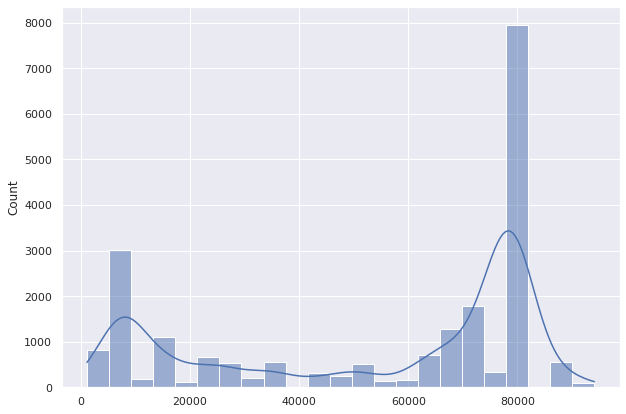

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=city_development_matrics_boxcox, kde=True)

Insights:
* Given that city development index/matrics are similar in data the skewness for both columns were the same

* Box-cox could serve as a viable alternative to the quantile transform in reducing skewness but the quantile transform is still the best performing function.

In [ ]:
df_data['training_hours'].skew()

1.8248521091084278

In [ ]:
training_hours_log = np.log(df_data['training_hours'])
training_hours_log.skew()

-0.46161255723240674

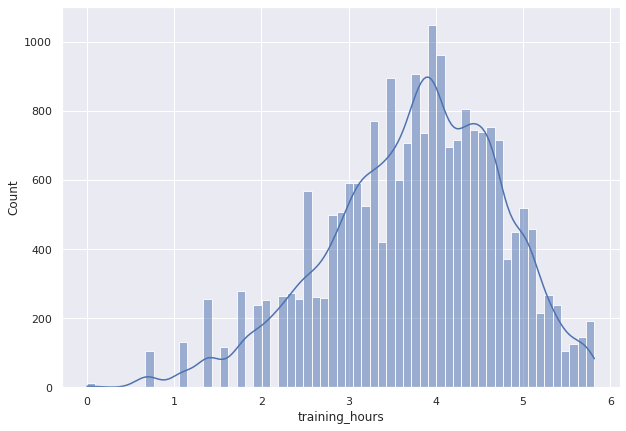

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=training_hours_log, kde=True)

In [ ]:
training_hours_sqrt = np.sqrt(df_data['training_hours'])
training_hours_sqrt.skew()

0.7380910698776774

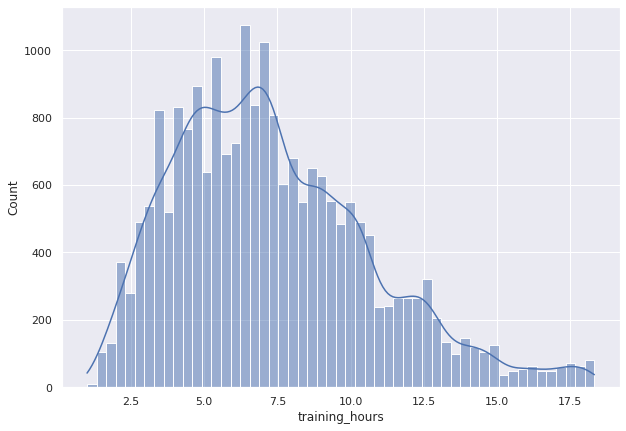

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=training_hours_sqrt, kde=True)

In [ ]:
training_hours_boxcox = stats.boxcox(df_data['training_hours'])[0]
pd.Series(training_hours_boxcox).skew()

-0.019395196551357487

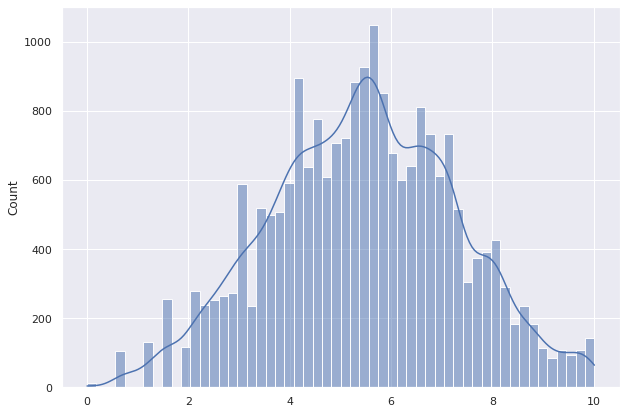

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data=training_hours_boxcox, kde=True)

Insights:
* Sqrt function was able to slightly fix training hours skewness but the box-cox had a better performance and was able to bring the distribution of training hours to normal.

* Quantile Transform was the best performing for training hours as it was able to make the distribution completely normal.